# SSO Observation Planning Tools
Author: Rodrigo C Boufleur (2021) rcboufleur at gmail.com

This notebook help to visualize Solar System objects ephemeris and elevation paths to aid observations planning and execution.
(Check auxiliar_functions.py for dependencies)

In [1]:
# import auxiliar functions
import auxiliar_functions as af
import numpy as np
import astropy.units as u

## Time and Location settings

In [2]:
# Please provide the appropriate times and observatory location 
# Also provide the appropriate timezone (utc)

start_time = '2021-07-30T17:00:00'  
stop_time = '2021-07-31T07:00:00'
step = '1m'  # examples: 10d, 60s, 1m, 6h 
utc = -3 # timezone
location = '874' # observatory code, OPD: 874


# specify your prioritary objects
prioritary = ['haumea', '2010 JO179', '1994 CO', '2011 KT19', '2008 OG19', 'Crantor', '2010 OO127',
              '2014 NW65', '2014 UN271']

# specify your non-prioritary objects. If none it can be set as secondary=''
secondary = ['Dziewanna', 'varda', '2015 BZ518', 'Siarnaq', 'Leda', 'Nereid', 'Salacia', 
             'Eris', '2005 UQ513', 'Lempo' ]

### Plot elevation curves

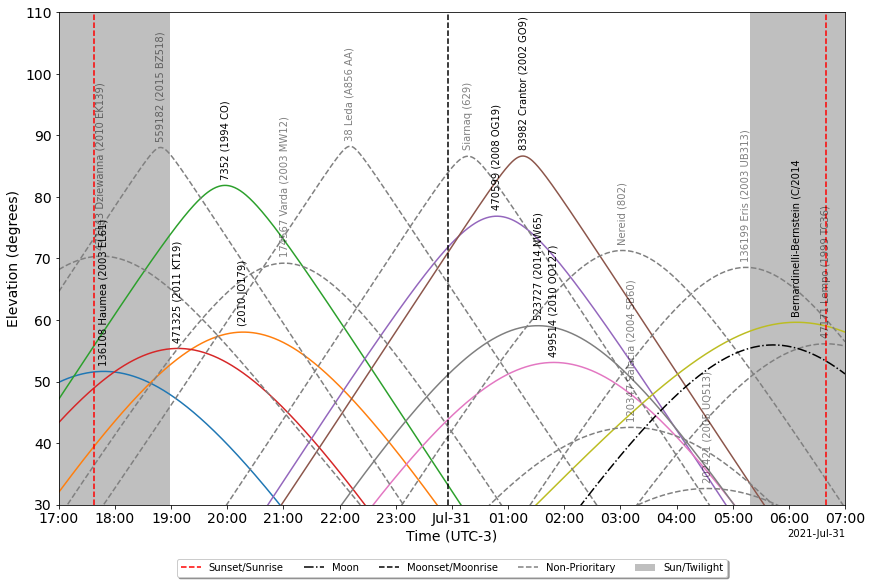

In [3]:
# Even for a single object always supply prioritary as a list, e.g., ['Siarnaq']
# To suppress 'secondary' (or 'prioritary') variable set secondary=''
# lower_ and upper_lim are the limits in the elevation displayed on the plot
# To suppress Sun or Moon information set the corresponding variables as False
# To supress saving the image set the variable save=''

af.plot_elevation_curves(prioritary=prioritary, secondary=secondary, 
                      lower_lim=30, upper_lim=110, utc=utc,
                      start_time=start_time, stop_time=stop_time, step=step,
                      sun=True, moon=True,
                      save='elevations_utc'+str(utc))

## Get ephemeris for specific object

In [4]:
# Always supply start and end times corresponding to the proper utc

obj = 'Siarnaq'
start_time = '2021-07-31T00:00:00'
stop_time = '2021-07-31T01:00:00'
step = '5m'  #Examples: 10d, 60s, 1m, 6h 
location = '874' #OPD
utc = -3

# computations
ephemeris = af.ephem(start_time, stop_time, step, utc=utc, obj_id=obj)
eph = af.reorder_table(ephemeris.copy())
print('::Output times always given in UT+0::')
print('::Coordinates at Maximum Elevation::\n')
print(eph[np.argmax(eph['EL'].data)])

print('\n\n')
eph.show_in_notebook()

# if you want ra and dec in degrees use the table ephemeris instead
# ephemeris.show_in_notebook()

::Output times always given in UT+0::
::Coordinates at Maximum Elevation::

   datetime_str               RA_DEC            flags     EL     V  alpha  lunar_elong lunar_illum
       ---                    hmsdms             ---     deg    mag  deg       deg          %     
----------------- ----------------------------- ----- --------- --- ------ ----------- -----------
2021-Jul-31 03:15 20 49 22.6584  -19 13 35.976      m 86.576149  -- 0.2247        84.6     53.3389





idx,datetime_str,RA_DEC,flags,EL,V,alpha,lunar_elong,lunar_illum
,---,hmsdms,---,deg,mag,deg,deg,%
0,2021-Jul-31 03:00,20 49 22.8432 -19 13 35.112,m,84.75908,--,0.2255,84.5,53.436
1,2021-Jul-31 03:05,20 49 22.7808 -19 13 35.4,m,85.586943,--,0.2252,84.5,53.4033
2,2021-Jul-31 03:10,20 49 22.7208 -19 13 35.688,m,86.228156,--,0.2249,84.6,53.371
3,2021-Jul-31 03:15,20 49 22.6584 -19 13 35.976,m,86.576149,--,0.2247,84.6,53.3389
4,2021-Jul-31 03:20,20 49 22.5984 -19 13 36.228,t,86.541231,--,0.2244,84.6,53.3072
5,2021-Jul-31 03:25,20 49 22.536 -19 13 36.516,m,86.133767,--,0.2241,84.7,53.2758
6,2021-Jul-31 03:30,20 49 22.476 -19 13 36.804,m,85.452848,--,0.2238,84.7,53.2446
7,2021-Jul-31 03:35,20 49 22.4136 -19 13 37.056,m,84.600996,--,0.2235,84.8,53.2138
8,2021-Jul-31 03:40,20 49 22.3536 -19 13 37.344,m,83.64664,--,0.2232,84.8,53.1833


### Retrive sky image

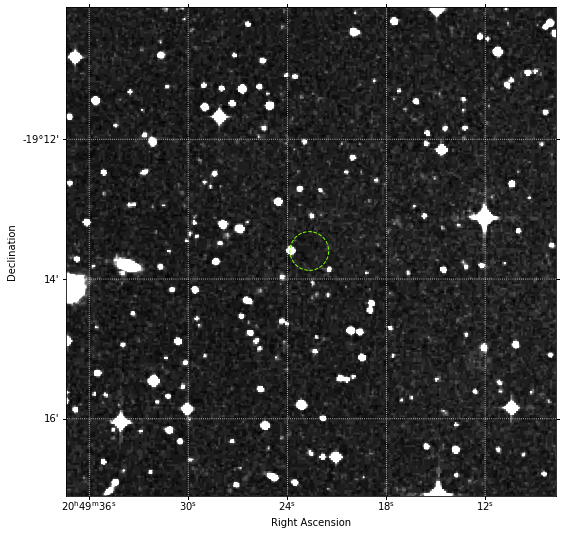

Saved as [PNG]:  Siarnaq_2021-Jul-31T03_15


In [5]:
# image retrieval
output_name = obj.replace(' ', '_')+'_'+eph['datetime_str'][np.argmax(eph['EL'].data)].replace(' ','T')
output_name = output_name.replace(':','_')

# to search for more available suveys use
# '2MASS-J', '2MASS-H', '2MASS-K', 'DSS1 Red', 'DSS1 Blue', 'DSS2 Red', 'DSS2 Blue', 'DSS2 IR'
#>>> SkyView.list_surveys()
af.plot_image_and_location(ephemeris, survey='DSS', pixels='2048', radius=7*u.arcmin, 
                           body_path=False, save=output_name)

print('Saved as [PNG]: ', output_name)